In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# top 5 zip codes
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# top 5 townships
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
# unique title codes
df["title"].nunique()

110

In [8]:
# creating a Reason column from title column
df["Reason"] = df["title"].apply(lambda title:title.split(":")[0])
df["Reason"]

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [9]:
# most common reason for calling 911
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

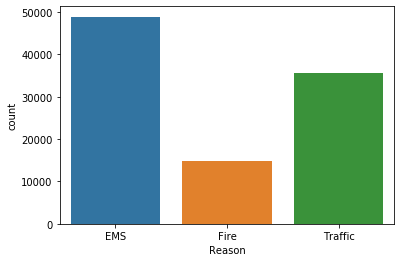

In [10]:
sns.countplot(x="Reason", data=df)

In [11]:
# converting timestamp into datetime
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# creating Hour, Month and Day of week columns
df["Hour"] = df["timeStamp"].apply(lambda time:time.hour)
df["Month"] = df["timeStamp"].apply(lambda time:time.month)
df["Day of week"] = df["timeStamp"].apply(lambda time:time.dayofweek)

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [14]:
# mapping Day of week with strings
dmap = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
df["Day of week"] = df["Day of week"].map(dmap)

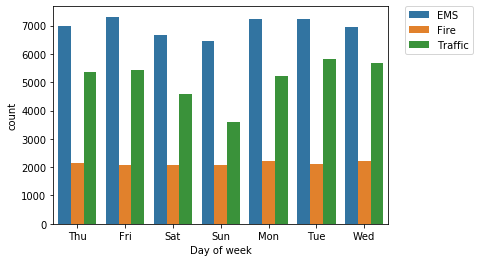

In [15]:
# Plotting number of calls based on day of the week
sns.countplot(x="Day of week", data= df, hue= "Reason")
# relocating the legend
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

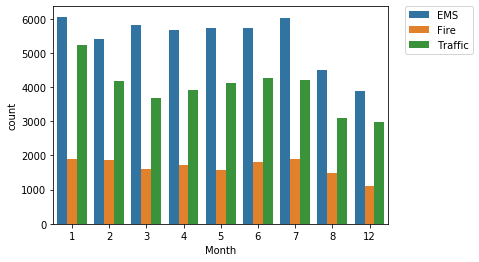

In [16]:
# Plotting number of calls based on month
sns.countplot(x="Month", data= df, hue= "Reason")
# relocating the legend
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

In [17]:
# creating a Date column
df["Date"] = df["timeStamp"].apply(lambda t:t.date()) 
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


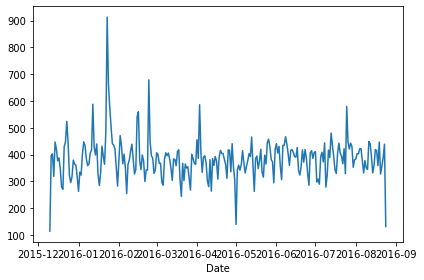

In [18]:
# plotting total number of calls based on date
df.groupby("Date").count()["lat"].plot()
plt.tight_layout()

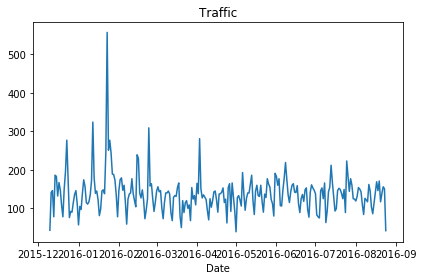

In [19]:
# plotting number of "traffic" calls based on date
df[df["Reason"] == "Traffic"].groupby("Date").count()["lat"].plot()
plt.title("Traffic")
plt.tight_layout()

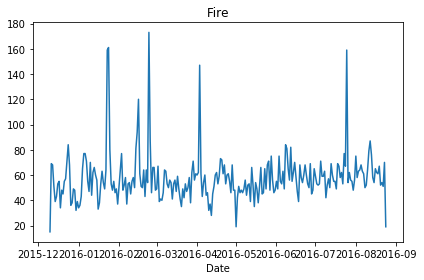

In [20]:
# plotting number of "Fire" calls based on date
df[df["Reason"] == "Fire"].groupby("Date").count()["lat"].plot()
plt.title("Fire")
plt.tight_layout()

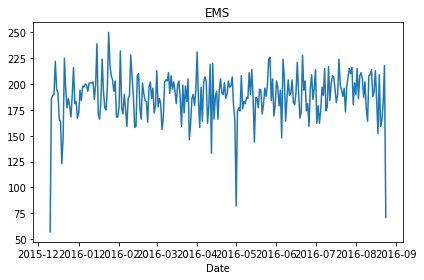

In [21]:
# plotting number of "EMS" calls based on date
df[df["Reason"] == "EMS"].groupby("Date").count()["lat"].plot()
plt.title("EMS")
plt.tight_layout()

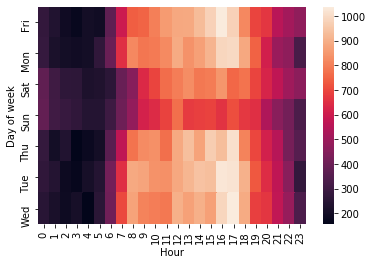

In [22]:
# creating a heatmap based on Day of week and Hour
dayHour = df.groupby(by=["Day of week", "Hour"]).count()["Reason"].unstack()
sns.heatmap(dayHour)

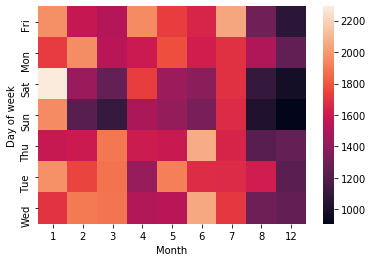

In [23]:
# creating a heatmap based on Day of week and Month
dayHour = df.groupby(by=["Day of week", "Month"]).count()["Reason"].unstack()
sns.heatmap(dayHour)